# Problem Set 8
## MACS 30150
## Songrun He

### Problem 1

In [4]:
import numpy as np
import pandas as pd

biden = pd.read_csv('biden.csv')
print(biden.head())
biden.describe()

   biden  female  age  educ  dem  rep
0     90       0   19    12    1    0
1     70       1   51    14    1    0
2     60       0   27    14    0    0
3     50       1   43    14    1    0
4     60       1   38    14    0    1


,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


### (a)

Split the data into a training set (70%) and a test set (30%) using the
sklearn.model selection.train test split() function with random state=25.
Setting the seed will guarantee you all get the same results. Use recursive
binary splitting to fit a decision tree to the training data, with biden
as the response variable and the other variables as predictors. Set the
max depth=3 and min samples leaf=5 Plot the tree and interpret the re-
sults. What is the test MSE?

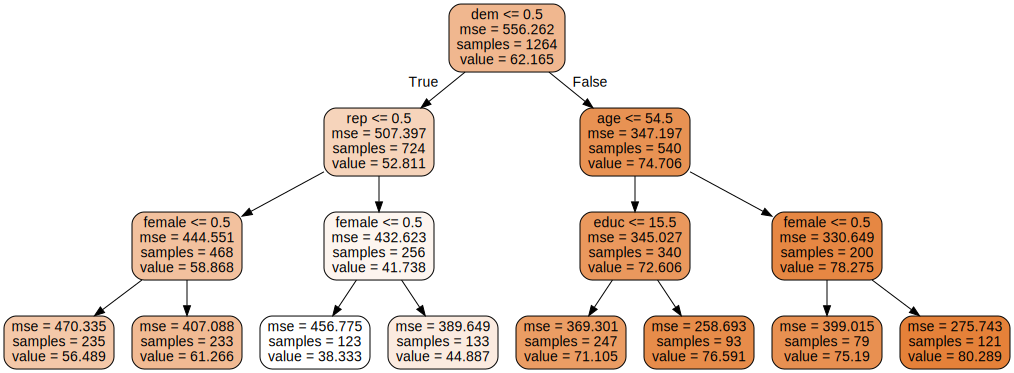

In [13]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

y = biden['biden'].values
X = biden[['female', 'age', 'dem', 'rep', 'educ']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 25)
bid_tree = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
bid_tree.fit(X_train, y_train)

bid_tree_viz = export_graphviz(
    bid_tree,
    out_file = None,
    feature_names = ["female", "age", "dem", "rep", "educ"],
    class_names = biden.biden,
    rounded = True,
    filled = True,
)

graph = graphviz.Source(bid_tree_viz)
graph.render('bid_tree_viz')
graph

From the above graph, the decision tree splits the predictors into eight terminal nodes. The decision procedure is: first, divide based on dem. Then the left branch is splitted by rep and right branch by age. For the next level, the four nodes are further divided by female, female, educ and female. The most accurate prediction on the training set is type with dem = 1, age <=54.5 and educ > 15.5.

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = bid_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('The MSE on test set is: ', MSE1)

The MSE on test set is:  396.1937146321307


### (b)

In [40]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

seed = np.random.seed(25)

param_dist1 = {'max_depth': [3,10],
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf': sp_randint(2,20)}
RSCV = RandomizedSearchCV(DecisionTreeRegressor(), param_dist1,
                          n_iter = 100, n_jobs = -1, cv = 5, random_state = 25,
                          scoring = 'neg_mean_squared_error')
bid_tree2 = RSCV.fit(X, y)
print('Optimal tuning parameter:', bid_tree2.best_params_)
print('MSE of the optimal resutls:', abs(bid_tree2.best_score_))

Optimal tuning parameter: {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
MSE of the optimal resutls: 401.6903602232667


### (c)

In [43]:
from sklearn.ensemble import RandomForestRegressor

seed = np.random.seed(25)

rfr_gen = RandomForestRegressor(random_state = 25)
param_dist2 = {'n_estimators': [10,200],
               'max_depth': [3,10],
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf': sp_randint(2,20),
               'max_features': sp_randint(1,5)}
RSCV2 = RandomizedSearchCV(rfr_gen, param_dist2,
                          n_iter = 100, n_jobs = -1, cv = 5, random_state = 25,
                          scoring = 'neg_mean_squared_error')
bid_rf = RSCV2.fit(X, y)
print('The optimal tuning parameter values for random forest model is:', bid_rf.best_params_)
print('The MSE of the optimal results:', abs(bid_rf.best_score_))

The optimal tuning parameter values for random forest model is: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
The MSE of the optimal results: 397.2581460664323


### Problem 2

In [44]:
df1 = pd.read_csv('Auto.csv', na_values = '?')
df1.dropna(inplace = True)
print(df1.head())
df1.describe()

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### (a)

In [49]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

seed = np.random.seed(25)

tf = df1['mpg']>=df1['mpg'].median()
df1['mpg_high'] = np.where(tf, 1, 0)
oritf1 = df1['origin'] == 1
df1['orgn1'] = np.where(oritf1, 1, 0)
oritf2 = df1['origin'] == 2
df1['orgn2'] = np.where(oritf2, 1, 0)
Xvars = df1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
            'orgn1', 'orgn2']].values
yvars = df1['mpg_high'].values

kf = KFold(n_splits = 4, shuffle = True, random_state = 25)
kf.get_n_splits(Xvars)
err_vec1 = np.zeros(4)
err_vec0 = np.zeros(4)
MSE_vec_kf = np.zeros(4)

k_ind = int(0)

for train_index, test_index in kf.split(Xvars):
    
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    err_vec1[k_ind] = np.sum((y_test!=y_pred)&(y_test == 1))/np.sum(y_test == 1)
    err_vec0[k_ind] = np.sum((y_test!=y_pred)&(y_test == 0))/np.sum(y_test == 0)
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
err_1 = err_vec1.mean()
err_0 = err_vec0.mean()
print('The MSE of 4-fold cross validation logistic regression on the test set is:', MSE_kf)
print('Overall error rate for mpg_high = 1 is:', err_1)
print('Overall error rate for mpg_high = 0 is:', err_0)

The MSE of 4-fold cross validation logistic regression on the test set is: 0.09693877551020408
Overall error rate for mpg_high = 1 is: 0.07941477339674582
Overall error rate for mpg_high = 0 is: 0.11364706285146922


### (b)

In [52]:
from  sklearn.ensemble import RandomForestClassifier

seed = np.random.seed(25)

rfc_gen = RandomForestClassifier(random_state = 25)
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

RSCV3 = RandomizedSearchCV(rfc_gen, param_dist3, n_iter = 100, n_jobs = -1, cv = 4,
                           random_state = 25, scoring = 'neg_mean_squared_error')

random_forest = RSCV3.fit(Xvars, yvars)
print('Optimal tuning parameter values using random forest:', random_forest.best_params_)
print('MSE of the optimal results:', abs(random_forest.best_score_))

Optimal tuning parameter values using random forest: {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE of the optimal results: 0.08928571428571429


### (c)

In [56]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

seed = np.random.seed(25)

param_dist4 = {'C': sp_uniform(loc = 0.2, scale = 4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
RSCV4 = RandomizedSearchCV(SVC(kernel = 'rbf'), param_dist4,
                          n_iter = 100, n_jobs = -1, cv = 4, random_state = 25,
                          scoring = 'neg_mean_squared_error')

random_SVM = RSCV4.fit(Xvars, yvars)
print('Optimal tuning parameter values for SVM:', random_SVM.best_params_)
print('MSE of the optimal results:', abs(random_SVM.best_score_))

Optimal tuning parameter values for SVM: {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE of the optimal results: 0.11989795918367346


### (d)

Based on the comparison of the MSE, the best predictor of mpg_high is Random Forest classifier because it has the smallest mean squared error of prediction. 